# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from feature_engine.selection import SmartCorrelatedSelection, RecursiveFeatureElimination

%matplotlib inline

# Loading Data

In [2]:
data = pd.read_parquet(r"C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/data/2022/V3_FeatureEngineering_Data.parquet")
data.head().T

,0,1,2,3,4
passenger_demand,12127,11245,13665,14770,13868
taxi_demand,8487,7888,9788,10527,9697
timestamp,2022-04-01 15:00:00,2022-04-01 16:00:00,2022-04-01 17:00:00,2022-04-01 18:00:00,2022-04-01 19:00:00
timestamp_month,4,4,4,4,4
timestamp_quarter,2,2,2,2,2
timestamp_semester,1,1,1,1,1
timestamp_year,2022,2022,2022,2022,2022
timestamp_week,13,13,13,13,13
timestamp_day_of_week,4,4,4,4,4
timestamp_day_of_month,1,1,1,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713 entries, 0 to 8712
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   passenger_demand                  8713 non-null   int64         
 1   taxi_demand                       8713 non-null   int64         
 2   timestamp                         8713 non-null   datetime64[ns]
 3   timestamp_month                   8713 non-null   int32         
 4   timestamp_quarter                 8713 non-null   int32         
 5   timestamp_semester                8713 non-null   int64         
 6   timestamp_year                    8713 non-null   int32         
 7   timestamp_week                    8713 non-null   int64         
 8   timestamp_day_of_week             8713 non-null   int32         
 9   timestamp_day_of_month            8713 non-null   int32         
 10  timestamp_day_of_year             8713 non-null 

In [4]:
df = data.copy()

# Lets's Check Correlation

In [5]:
corr = df.corr()[['passenger_demand','taxi_demand']]

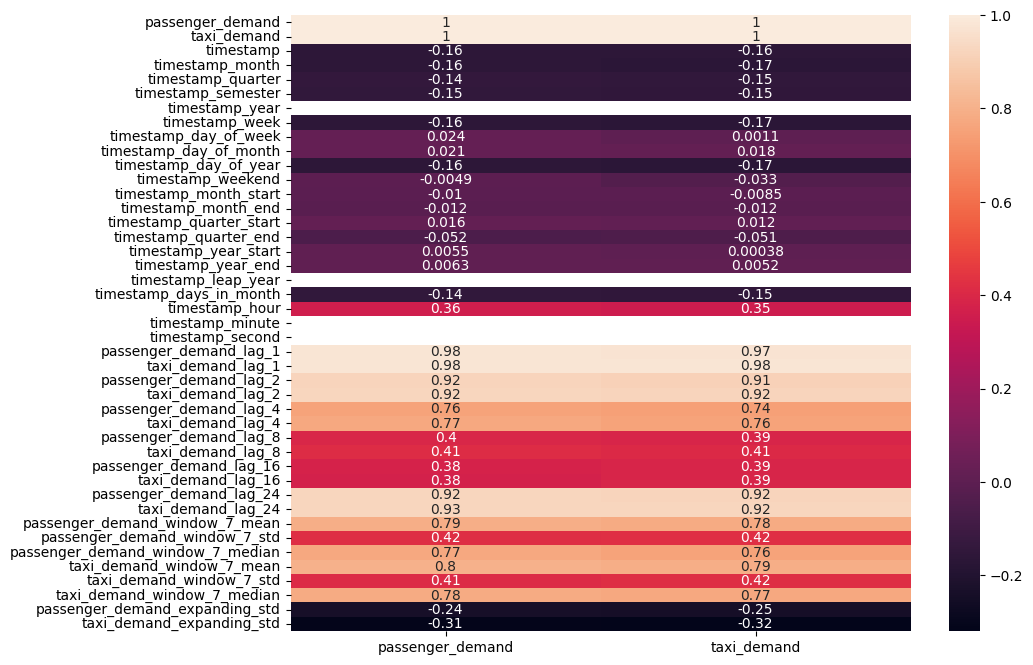

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True )
plt.show()

<Axes: >

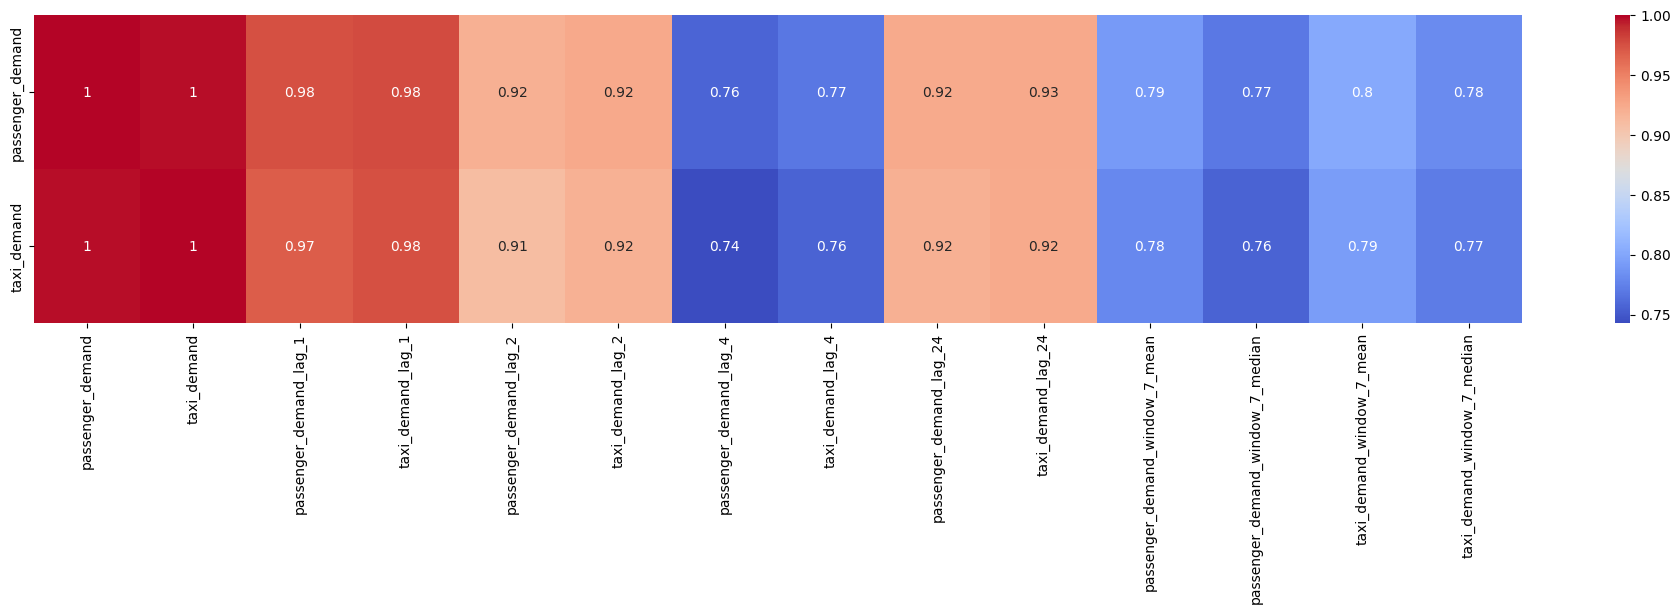

In [7]:
plt.figure(figsize=(24, 4))
sns.heatmap(
    corr.loc[(corr.passenger_demand>0.5) | (corr.taxi_demand>0.5)].T,
    annot=True, cmap='coolwarm'
)

# Feature Selection

In [8]:
def select_best_features(df):
    ### feature, target split
    X = df.drop(columns=['timestamp','passenger_demand', 'taxi_demand'])
    y = df['taxi_demand']
    
    ### smart correlated selection
    scs = SmartCorrelatedSelection(
        variables=None, method='pearson', threshold=0.5, 
        missing_values='ignore', selection_method='variance', 
        confirm_variables=False
    )
    scs_columns = set(scs.fit_transform(X).columns)
    
    
    ### recursive FE
    rfe = RecursiveFeatureElimination(
        DecisionTreeRegressor(max_depth=3), scoring='r2', cv=3, threshold=0.01, 
        variables=None, confirm_variables=False
    )
    
    rfe_columns = rfe.fit_transform(X, y)
    scs_columns.update(rfe_columns)
    
    return scs_columns

In [22]:
# SmartCorrelatedSelection?

In [10]:
X = df.drop(columns=['timestamp','passenger_demand', 'taxi_demand'])
y = df['taxi_demand']

In [11]:
scs = SmartCorrelatedSelection(
        variables=None, method='pearson', threshold=0.8, 
        missing_values='ignore', selection_method='variance', 
        confirm_variables=False
    )

In [12]:
scs.fit_transform(X).columns

Index(['timestamp_year', 'timestamp_day_of_week', 'timestamp_day_of_month',
       'timestamp_day_of_year', 'timestamp_weekend', 'timestamp_month_start',
       'timestamp_month_end', 'timestamp_quarter_start',
       'timestamp_quarter_end', 'timestamp_year_start', 'timestamp_year_end',
       'timestamp_leap_year', 'timestamp_days_in_month', 'timestamp_hour',
       'timestamp_minute', 'timestamp_second', 'passenger_demand_lag_1',
       'passenger_demand_lag_8', 'passenger_demand_lag_16',
       'passenger_demand_expanding_std'],
      dtype='object')

In [13]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [25]:
# RecursiveFeatureElimination?

In [15]:
rfe = RecursiveFeatureElimination(
    dt, scoring='r2', cv=3, threshold=0.01, 
    variables=None, confirm_variables=False
)

In [16]:
rfe.fit_transform(X, y)

,timestamp_quarter,timestamp_year,timestamp_week,timestamp_day_of_week,timestamp_month_end,timestamp_quarter_start,timestamp_quarter_end,timestamp_year_start,timestamp_year_end,timestamp_leap_year,...,taxi_demand_lag_2,taxi_demand_lag_8,passenger_demand_lag_16,passenger_demand_lag_24,taxi_demand_lag_24,passenger_demand_window_7_mean,passenger_demand_window_7_std,taxi_demand_window_7_std,passenger_demand_expanding_std,taxi_demand_expanding_std
0,2,2022,13,4,0,1,0,0,0,0,...,6896.0,4262.0,121.0,4.0,4.0,8667.000000,1319.548534,878.098704,3823.294951,2793.794980
1,2,2022,13,4,0,1,0,0,0,0,...,7792.0,5271.0,5046.0,3.0,3.0,9387.285714,1647.444760,1051.583387,4127.546522,2986.330622
2,2,2022,13,4,0,1,0,0,0,0,...,8487.0,5419.0,3159.0,0.0,0.0,9953.142857,1475.939072,918.180525,4301.369187,3095.867280
3,2,2022,13,4,0,1,0,0,0,0,...,7888.0,6015.0,1850.0,0.0,0.0,10738.285714,1795.826153,1204.295981,4604.987587,3310.305959
4,2,2022,13,4,0,1,0,0,0,0,...,9788.0,6294.0,894.0,0.0,0.0,11607.857143,2085.161419,1429.317603,4924.257225,3532.477627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,2,2022,22,1,1,0,0,0,0,0,...,5787.0,231.0,7850.0,6166.0,4208.0,4637.285714,3147.014549,2389.479979,4050.349704,2878.709686
8709,2,2022,22,1,1,0,0,0,0,0,...,5744.0,321.0,6974.0,7738.0,5135.0,5785.142857,2814.693437,2093.299025,4050.445696,2878.805813
8710,2,2022,22,1,1,0,0,0,0,0,...,6242.0,808.0,6762.0,8225.0,5475.0,6872.285714,2078.739339,1488.104915,4050.572934,2878.931764
8711,2,2022,22,1,1,0,0,0,0,0,...,6444.0,2182.0,5796.0,8518.0,5735.0,7818.857143,1231.704974,825.342122,4050.802648,2879.133633


In [17]:
best = select_best_features(df)

In [18]:
best

{'passenger_demand_expanding_std',
 'passenger_demand_lag_1',
 'passenger_demand_lag_16',
 'passenger_demand_lag_8',
 'taxi_demand_lag_1',
 'timestamp_day_of_month',
 'timestamp_day_of_week',
 'timestamp_day_of_year',
 'timestamp_days_in_month',
 'timestamp_hour',
 'timestamp_leap_year',
 'timestamp_minute',
 'timestamp_month_end',
 'timestamp_month_start',
 'timestamp_quarter_end',
 'timestamp_second',
 'timestamp_year',
 'timestamp_year_end',
 'timestamp_year_start'}

In [19]:
v4 = df[['timestamp', 'taxi_demand']+list(best)]

In [20]:
v4.head().T

,0,1,2,3,4
timestamp,2022-04-01 15:00:00,2022-04-01 16:00:00,2022-04-01 17:00:00,2022-04-01 18:00:00,2022-04-01 19:00:00
taxi_demand,8487,7888,9788,10527,9697
timestamp_quarter_end,0,0,0,0,0
timestamp_year_start,0,0,0,0,0
timestamp_leap_year,0,0,0,0,0
timestamp_hour,15,16,17,18,19
timestamp_days_in_month,30,30,30,30,30
passenger_demand_expanding_std,3823.294951,4127.546522,4301.369187,4604.987587,4924.257225
timestamp_day_of_week,4,4,4,4,4
taxi_demand_lag_1,7792.0,8487.0,7888.0,9788.0,10527.0


In [21]:
v4.to_parquet(r"C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/data/2022/V4_FeatureSelection_Data.parquet", index=False)